# Introduction to Qiskit

**A brief review**

1. Qubits: A *normalized* column vector $\quad$
    $|0\rangle = \begin{pmatrix} 1\\ 0 \end{pmatrix}$
    $|1\rangle = \begin{pmatrix} 0\\ 1 \end{pmatrix}$ $\quad$ $|\psi\rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \alpha|0\rangle + \beta|1\rangle$.

2. Measurement: Qubit collapses to $|0\rangle$ or $|1\rangle$; $\quad$ measure $|\psi\rangle$ $\Rightarrow$ $|0\rangle$ with probability $|\alpha|^2$, $|1\rangle$ with probability $|\beta|^2$ $\Rightarrow$ $|\alpha|^2 + |\beta|^2 = 1$.

3. Gates: Quantum gates are unitary operators $U|\psi\rangle = |\phi\rangle$. Action of any quantum gate is a rotation on the Bloch sphere.

###  Importing the required libraries

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install 'qiskit[visualization]'

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

### The first quantum circuit

We can define the number of quantum and classical registers that we want. A quantum register is a qubit, and a classical register is a bit that will hold the measurement outcome of the qubit. A QuantumCircuit is an object that takes the quantum and classical registers.

In [10]:
# initialize a quantum circuit with 2 qubits and 2 cbits

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

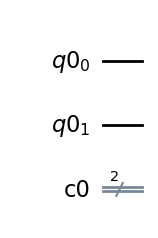

In [4]:
qc.draw('mpl')

All qubits are initialized in |0>. In the Bloch sphere representation, this is the north pole. This is a 2-qubit system, so there should be two Bloch spheres, one for each qubit -- both of them pointing to the north pole.

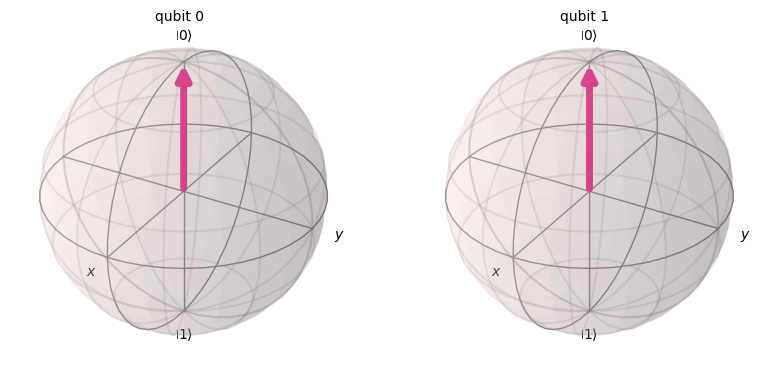

In [5]:
plot_bloch_multivector(qc)

Let us now measure the qubits. Since the qubits are in state |00>, the outcome should be 00 itself with probability 1.

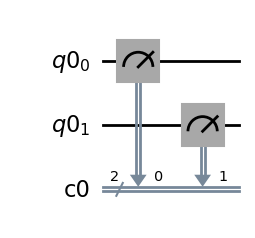

In [6]:
qc.measure(qr,cr)
qc.draw('mpl')

In order to simulate the circuit, we need to define a simulator to run the circuit. We shall use Qiskit Aer for simulation.

In [7]:
from qiskit_aer import Aer

We will use Statevector simulator to simulate statevectors

In [11]:
simulator = Aer.get_backend("statevector_simulator")
result = simulator.run(qc).result()

To retrieve the statevector, we will use the `get_statevector()` method.

In [12]:
sv = result.get_statevector()
print(sv)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


Let's create a bell state $\ket{\Phi^+}$

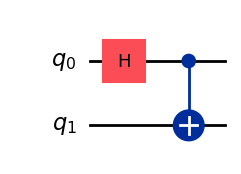

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

Let us verify our notion using Bloch sphere.

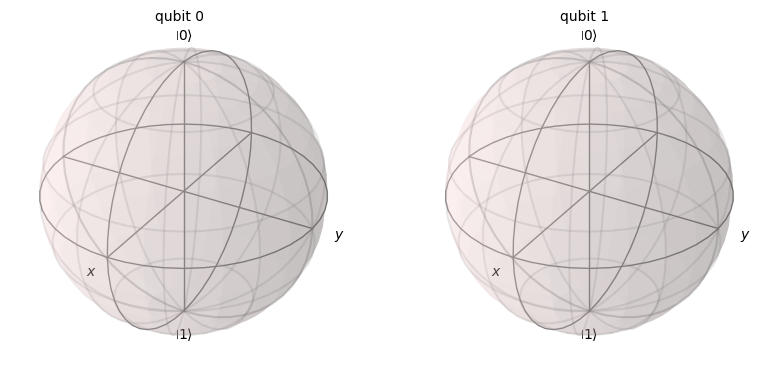

In [14]:
plot_bloch_multivector(qc)

In [15]:
result = simulator.run(qc).result()
sv = result.get_statevector()
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


To simulate the same circuit using shot based simulater, we will use QASM simulator

In [18]:
simulator = Aer.get_backend("qasm_simulator")
qc.measure_all()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'00 00 00': 525, '11 11 11': 499}


### Try out questions
Let's build some circuits and get our hands dirty.

Q1. Let's create all the bell states $\ket{\Phi^+}, \ket{\Phi^-}, \ket{\Psi^+}, \ket{\Psi^-}$ 

In [20]:
simulator = Aer.get_backend("statevector_simulator")

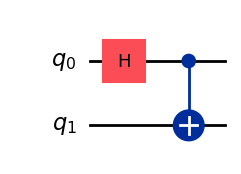

In [21]:
phi_plus = QuantumCircuit(2) # Implement your circuit here
phi_plus.h(0)
phi_plus.cx(0,1)

result = simulator.run(phi_plus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
phi_plus.draw("mpl")

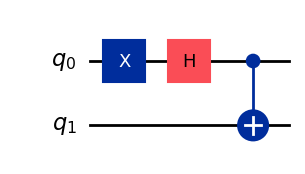

In [23]:
phi_minus = QuantumCircuit(2) # Implement your circuit here
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0,1)

result = simulator.run(phi_minus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])
phi_minus.draw("mpl")

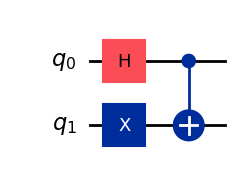

In [24]:
psi_plus = QuantumCircuit(2) # Implement your circuit here
psi_plus.x(1)
psi_plus.h(0)
psi_plus.cx(0,1)

result = simulator.run(psi_plus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[0, 1/np.sqrt(2), 1/np.sqrt(2), 0])
psi_plus.draw("mpl")

In [ ]:
psi_minus = None # Implement your circuit here

result = simulator.run(psi_minus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[0, -1/np.sqrt(2), 1/np.sqrt(2), 0])
psi_minus.draw("mpl")

Q2. Let's implement logic gates using quantum circuits

In [ ]:
simulator = Aer.get_backend("qasm_simulator")

In [ ]:
not_gate = None # Implement your circuit here

result = simulator.run(not_gate).result()
counts = result.get_counts()
print(counts)
not_gate.draw("mpl")

In [ ]:
xor_gate = None # Implement your circuit here

result = simulator.run(xor_gate).result()
counts = result.get_counts()
print(counts)
xor_gate.draw("mpl")

In [ ]:
and_gate = None # Implement your circuit here

result = simulator.run(and_gate).result()
counts = result.get_counts()
print(counts)
and_gate.draw("mpl")

In [ ]:
or_gate = None # Implement your circuit here

result = simulator.run(or_gate).result()
counts = result.get_counts()
print(counts)
or_gate.draw("mpl")

Q3. Implement GHZ state $\frac{1}{\sqrt{2}}(\ket{000} + \ket{111})$

{np.str_('000'): np.float64(0.5), np.str_('111'): np.float64(0.5)}


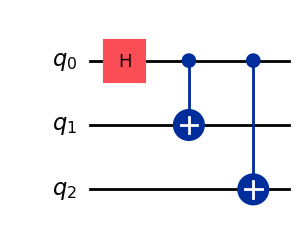

In [26]:
ghz =  QuantumCircuit(3) # Implement your circuit here
ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)


result = simulator.run(ghz).result()
counts = result.get_counts()
print(counts)
ghz.draw("mpl")

Q4. Design a Quantum Circuit which corresponds to this statevector

In [ ]:
required_sv = [ 0+0j, 0+0j, 0.707+0j, 0+0j, 0.707+0j, 0+0j, 0+0j, 0+0j ]
qc = None # Implement your circuit here

simulator = Aer.get_backend("statevector_simulator")
result = simulator.run(qc).result()
sv = result.get_statevector()
assert np.allclose(sv.data,required_sv, rtol=0.001)
qc.draw("mpl")